In [88]:
import sys

import numpy as np
import pandas as pd
import seaborn as sns
import s3fs

sys.path.append("/Users/fgu/dev/projects/mdb_eval")
import src.helpers.io as io
import src.helpers.data as hd
import src.data.aggregators as agg
import src.data.selectors as sl
import src.data.make_data as md

fs = s3fs.S3FileSystem(profile="3di")

pd.set_option("display.max_rows", 120)
pd.set_option("display.max_columns", 120)
pd.set_option("max_colwidth", None)
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [87]:
# load data

dfa = io.read_parquet('s3://3di-project-eval/eval.parquet')
hd.inspect(dfa)

dft = md.read_piece('~/tmp/mdb_111.parquet')
hd.inspect(dft)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
shape: (457,534, 28), users: 10923


,user_id,ym,ymn,txns_count,txns_volume,month_income,inflows,outflows,netflows,netflows_norm,inflows_norm,outflows_norm,has_pos_netflows,pos_netflows,t,tt,month_spend,user_registration_date,age,is_female,region,is_urban,has_sa_account,generation,generation_code,new_loan,prop_credit,disc_spend
0,820,2012-01,201201,108.0,8214.089844,3003.09668,2419.590088,1476.069946,943.520142,0.314182,0.805698,0.491516,1,943.520142,1,5,2412.290039,2011-08-15,40.0,0.0,south east,1.0,True,Gen X,2,0,0.0,0.271020
1,820,2012-02,201202,90.0,8090.180176,3003.09668,2448.179932,2131.070068,317.109863,0.105594,0.815219,0.709624,1,317.109863,1,6,2219.459961,2011-08-15,40.0,0.0,south east,1.0,True,Gen X,2,0,0.0,0.210479


Reading ~/tmp/mdb_111.parquet


KeyboardInterrupt: 

In [41]:
fp = 's3://3di-data-mdb/clean/'
# fp = 's3://3di-project-eval/'
fs.ls(fp, refresh=True, detail=False)

['3di-data-mdb/clean/',
 '3di-data-mdb/clean/mdb_000.parquet',
 '3di-data-mdb/clean/mdb_111.parquet',
 '3di-data-mdb/clean/mdb_777.parquet',
 '3di-data-mdb/clean/mdb_X11.parquet',
 '3di-data-mdb/clean/mdb_X77.parquet',
 '3di-data-mdb/clean/mdb_costa.parquet',
 '3di-data-mdb/clean/pieces',
 '3di-data-mdb/clean/samples']

In [51]:
k.region_name)

(array([0, 0, 0, ..., 1, 1, 1]),
 Index(['london', 'south east', 'south west', 'west midlands',
        'yorkshire and the humber', 'east of england', 'north west', 'scotland',
        'wales', 'east midlands', 'north east', 'northern ireland'],
       dtype='object'))

## dev

## dev -- agg tester

In [89]:
k = agg.num_accounts(dft)
k

num_accounts
user_id ym                   
111     2012-01            12
        2012-02            12
        2012-03            12
        2012-04            12
        2012-05            12
...                       ...
589111  2020-03             2
        2020-04             2
        2020-05             2
        2020-06             2
        2020-07             2

[7303 rows x 1 columns]

<AxesSubplot:xlabel='generation', ylabel='netflows'>

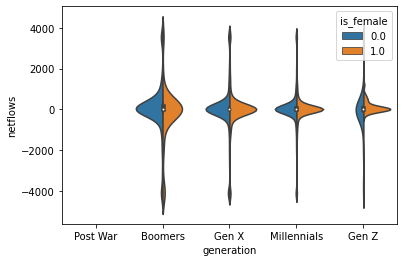

In [99]:
s = dfa.sample(10_000)
sns.violinplot(data=s, x='generation', y='netflows', hue='is_female', split=True)